In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [157]:
df=pd.read_csv("TF_2_Notebooks_and_Data/DATA/RSCCASN.csv",parse_dates=True,index_col="DATE")

In [158]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [159]:
df.columns=['Sales']

In [160]:
df.head()

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [161]:
df.size

334

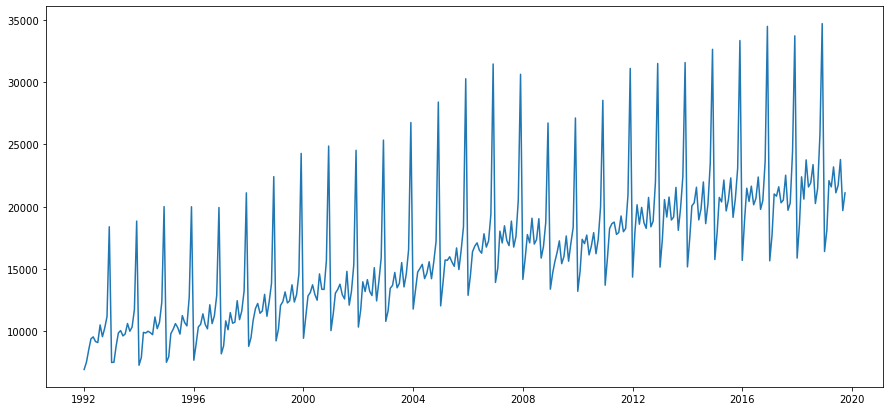

In [162]:
plt.figure(figsize=(15,7))
plt.plot(df)

In [163]:
test_data_len=18
train_data_len=len(df)-test_data_len

In [164]:
train_data=df.iloc[:train_data_len]
test_data=df.iloc[train_data_len:]

In [165]:
train_data.size

316

In [166]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18 entries, 2018-05-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   18 non-null     int64
dtypes: int64(1)
memory usage: 288.0 bytes


In [167]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [168]:
from sklearn.preprocessing import MinMaxScaler

In [169]:
scaler=MinMaxScaler()

In [170]:
train_scaled=scaler.fit_transform(train_data)
test_scaled=scaler.transform(test_data)

In [171]:
generator=TimeseriesGenerator(train_scaled,train_scaled,length=15,batch_size=1)

In [172]:
x,y=generator[0]

In [63]:
x

array([[[0.        ],
        [0.02127505],
        [0.05580163],
        [0.08942056],
        [0.09512053],
        [0.08146965],
        [0.07860151],
        [0.12979233],
        [0.09566512],
        [0.1203892 ],
        [0.15426227],
        [0.41595266],
        [0.02047633],
        [0.02127505],
        [0.06636654]]])

In [64]:
train_scaled

array([[0.        ],
       [0.02127505],
       [0.05580163],
       [0.08942056],
       [0.09512053],
       [0.08146965],
       [0.07860151],
       [0.12979233],
       [0.09566512],
       [0.1203892 ],
       [0.15426227],
       [0.41595266],
       [0.02047633],
       [0.02127505],
       [0.06636654],
       [0.10633895],
       [0.11345484],
       [0.09791606],
       [0.10368864],
       [0.13396747],
       [0.11163956],
       [0.12372931],
       [0.17506535],
       [0.43250799],
       [0.0124165 ],
       [0.03499855],
       [0.10829945],
       [0.10641156],
       [0.11149434],
       [0.10728289],
       [0.10154662],
       [0.1531731 ],
       [0.11904589],
       [0.13767064],
       [0.19663085],
       [0.47480395],
       [0.02105722],
       [0.03714058],
       [0.10445106],
       [0.11726692],
       [0.13367703],
       [0.12209556],
       [0.10332559],
       [0.1570578 ],
       [0.13694453],
       [0.12710572],
       [0.21104415],
       [0.474

In [66]:
y # next value

array([[0.10633895]])

In [67]:
#model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,SimpleRNN

In [86]:
model= Sequential()

model.add(LSTM(100,input_shape=(1,1),activation='relu'))

model.add(Dense(1))

model.compile(loss='mse',optimizer='adam')

In [93]:
from tensorflow.keras.callbacks import EarlyStopping

In [94]:
early_Stop=EarlyStopping(patience=2)

In [95]:
validation_gen= TimeseriesGenerator(test_scaled,test_scaled, length=15, batch_size=1)

In [96]:
model.fit_generator(generator=generator,epochs=18, validation_data=validation_gen)

Epoch 1/18
 24/301 [=>............................] - ETA: 1s - loss: 0.0182

C:\Users\sandy\AppData\Local\Temp/ipykernel_11044/3238920324.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=generator,epochs=18, validation_data=validation_gen)


301/301 [==============================] - 1s 5ms/step - loss: 0.0180 - val_loss: 0.0169
Epoch 2/18
301/301 [==============================] - 5s 16ms/step - loss: 0.0164 - val_loss: 0.0065
Epoch 3/18
301/301 [==============================] - 3s 9ms/step - loss: 0.0148 - val_loss: 0.0145
Epoch 4/18
301/301 [==============================] - 3s 10ms/step - loss: 0.0163 - val_loss: 0.0253
Epoch 5/18
301/301 [==============================] - 3s 10ms/step - loss: 0.0152 - val_loss: 0.0151
Epoch 6/18
301/301 [==============================] - 1s 4ms/step - loss: 0.0138 - val_loss: 0.0142
Epoch 7/18
301/301 [==============================] - 2s 7ms/step - loss: 0.0133 - val_loss: 0.0074
Epoch 8/18
301/301 [==============================] - 3s 10ms/step - loss: 0.0126 - val_loss: 0.0067
Epoch 9/18
301/301 [==============================] - 3s 10ms/step - loss: 0.0135 - val_loss: 0.0067
Epoch 10/18
301/301 [==============================] - 2s 8ms/step - loss: 0.0120 - val_loss: 0.0307
Epoch

In [97]:
loss=pd.DataFrame(model.history.history)

<AxesSubplot:>

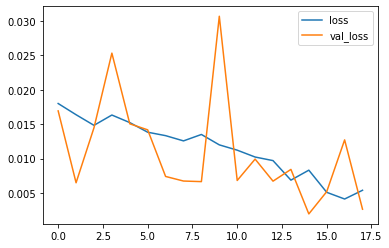

In [98]:
loss.plot()

In [173]:
first_batch= train_scaled[-15:]
current_batch= first_batch.reshape((1,15,1)) #(no of item, last 15 values,output)

prediction=[]

for i in range(len(test_data)):
    
        current_pred= model.predict(current_batch)[0] # 0 is to grabbing the numbers
        prediction.append(current_pred)
        
        current_batch= np.append(current_batch[:,1:,:],[[current_pred]], axis=1)
     
    
    

In [174]:
predict_scale=scaler.inverse_transform(prediction)

In [175]:
test_data['predict']=predict_scale

C:\Users\sandy\AppData\Local\Temp/ipykernel_11044/3168354845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predict']=predict_scale


In [176]:
test_data

,Sales,predict
DATE,,
2018-05-01,23764,22645.175448
2018-06-01,21589,21024.121017
2018-07-01,21919,21237.037976
2018-08-01,23381,21670.570062
2018-09-01,20260,21405.297685
2018-10-01,21473,21730.794390
2018-11-01,25831,25694.015819
2018-12-01,34706,31662.822442
2019-01-01,16410,20814.916055


<AxesSubplot:xlabel='DATE'>

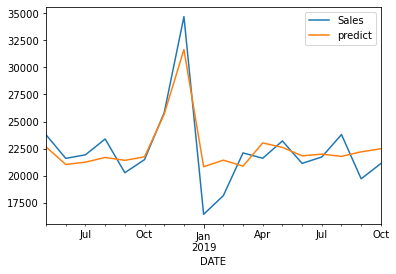

In [177]:
test_data.plot()

In [178]:
## forcasting the data from the whole data

In [179]:
full_scaled= scaler.fit_transform(df)

In [190]:
length=15

In [192]:
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(length,1)))

model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')

In [193]:
generator_forcast=TimeseriesGenerator(full_scaled,full_scaled, length=length, batch_size=1)

In [194]:
model.fit_generator(generator_forcast, epochs=8)

Epoch 1/8


C:\Users\sandy\AppData\Local\Temp/ipykernel_11044/2131510699.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator_forcast, epochs=8)


319/319 [==============================] - 2s 4ms/step - loss: 0.0244
Epoch 2/8
319/319 [==============================] - 1s 4ms/step - loss: 0.0217
Epoch 3/8
319/319 [==============================] - 3s 10ms/step - loss: 0.0190
Epoch 4/8
319/319 [==============================] - 3s 10ms/step - loss: 0.0184
Epoch 5/8
319/319 [==============================] - 1s 4ms/step - loss: 0.0160
Epoch 6/8
319/319 [==============================] - 2s 8ms/step - loss: 0.0154
Epoch 7/8
319/319 [==============================] - 1s 4ms/step - loss: 0.0148
Epoch 8/8
319/319 [==============================] - 1s 4ms/step - loss: 0.0147


In [197]:
first_batch= full_scaled[-length:]
current_batch= first_batch.reshape((1, length, 1))
period=15
forcast=[]

for i in range(period):
    
        current_pred= model.predict(current_batch)[0]
        forcast.append(current_pred)
        
        current_batch= np.append(current_batch[:,1:,:],[[current_pred]], axis=1)
     
    

In [198]:
forcast=scaler.inverse_transform(forcast)

In [199]:
forcast

array([[23426.4582243 ],
       [23758.4848814 ],
       [23823.40128326],
       [23586.04148245],
       [22848.02829027],
       [22545.07349586],
       [22824.20806551],
       [22975.63829231],
       [22969.59220552],
       [23050.24697018],
       [23139.55626202],
       [23069.44449568],
       [23114.40864563],
       [23366.25058699],
       [23498.62728214]])

In [200]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [202]:
forcast_index= pd.date_range('2019-11-01', periods=period, freq='MS')

In [216]:
forcast_df=pd.DataFrame(forcast, index=forcast_index, columns=['forcast'])

<AxesSubplot:>

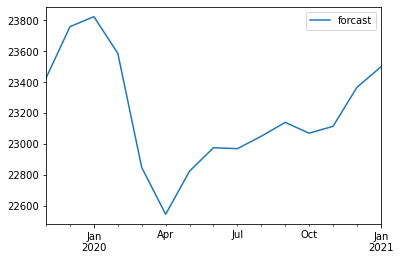

In [218]:
forcast_df.plot()

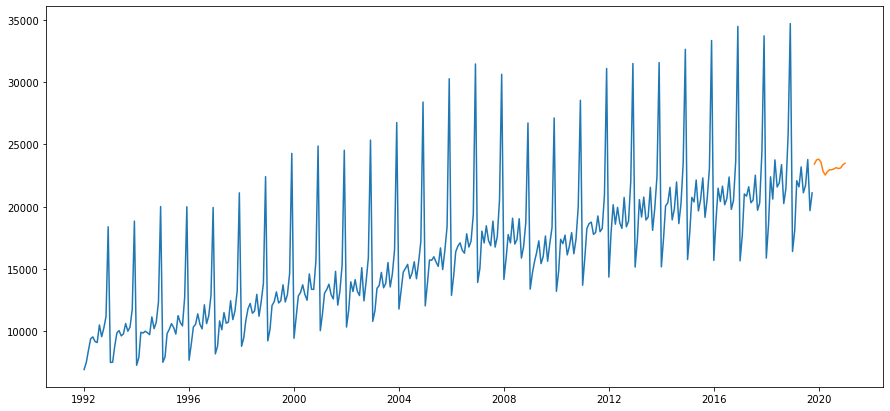

In [225]:
plt.figure(figsize=(15,7))
plt.plot(df.index, df.Sales)
plt.plot(forcast_df.index,forcast_df)
#plt.xlim('2016','2020')